#### Shalom schwartz statistics project  210025862

In [1]:
!pip install --upgrade scipy
import seaborn as sns
import pandas as pd
import statistics
import numpy as np 
import scipy.stats as st 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Requirement already up-to-date: scipy in c:\users\shalom\anaconda3\lib\site-packages (1.7.3)


In [2]:
url = 'https://raw.githubusercontent.com/ShaiYona/Statiscs_2022A/main/SevereIllness.csv'
corona_data = pd.read_csv(url)

# question 1:
## show final five rows of the data.

In [3]:
corona_data.tail()

,date,age_group,Vaccinated_Severe_Illness_Per_100K,OutDated_Vaccinated_Severe_Illness_Per_100K,Non_Vaccinated_Severe_Illness_Per_100K
85,06-11-2021,all population,0.4,1.0,4.8
86,06-11-2021,under age 60,0.1,0.6,2.7
87,07-11-2021,above age 60,1.4,3.8,50.3
88,07-11-2021,under age 60,0.1,0.6,2.6
89,07-11-2021,all population,0.4,1.0,4.5


# question 2
## show final five rows of the over 60 year old population data.

In [4]:
corona_data_population_over_60yrs_old = corona_data.loc[corona_data.age_group == 'above age 60'].copy()
corona_data_population_over_60yrs_old.tail()

,date,age_group,Vaccinated_Severe_Illness_Per_100K,OutDated_Vaccinated_Severe_Illness_Per_100K,Non_Vaccinated_Severe_Illness_Per_100K
75,03-11-2021,above age 60,1.6,8.7,56.4
79,04-11-2021,above age 60,1.5,4.8,54.1
81,05-11-2021,above age 60,1.4,4.8,55.0
84,06-11-2021,above age 60,1.4,3.8,54.3
87,07-11-2021,above age 60,1.4,3.8,50.3


# QUESTION 3 - graph of all three different populations.
## - amount sick per date.

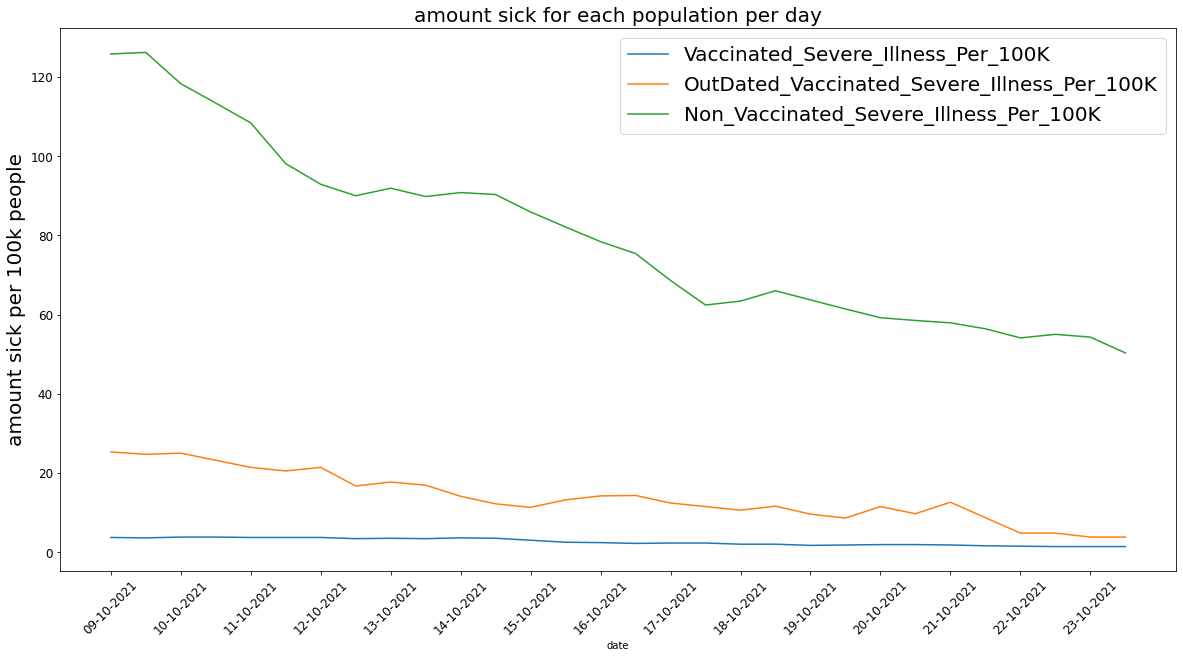

In [23]:
dates = corona_data_population_over_60yrs_old['date']
steps = range(0,len(dates),2)
corona_data_population_over_60yrs_old.plot(x="date", y=["Vaccinated_Severe_Illness_Per_100K", "OutDated_Vaccinated_Severe_Illness_Per_100K", "Non_Vaccinated_Severe_Illness_Per_100K"], kind="line",fontsize = 12,figsize=(20, 10))
plt.legend(fontsize=20)
plt.xticks(ticks = steps, labels = dates[::1], rotation = "45" )
plt.ylabel('amount sick per 100k people',fontsize=20)
plt.title("amount sick for each population per day",fontsize = 20)
plt.show()

# QUESTION 4:

In [6]:
outdated_vaccinated_over_60_population = st.norm.interval(alpha=0.99, loc=np.mean(corona_data_population_over_60yrs_old['OutDated_Vaccinated_Severe_Illness_Per_100K']), scale=st.sem(corona_data_population_over_60yrs_old['OutDated_Vaccinated_Severe_Illness_Per_100K']))
outdated_vaccinated_over_60_population

(10.912939551908828, 16.827060448091178)

In [7]:
vaccinated_population_over_60 = st.norm.interval(alpha=0.99, loc=np.mean(corona_data_population_over_60yrs_old['Vaccinated_Severe_Illness_Per_100K']), scale=st.sem(corona_data_population_over_60yrs_old['Vaccinated_Severe_Illness_Per_100K']))
vaccinated_population_over_60

(2.19348980579389, 3.0398435275394444)

In [8]:
non_vaccinated_population_over_60 = st.norm.interval(alpha=0.99, loc=np.mean(corona_data_population_over_60yrs_old['Non_Vaccinated_Severe_Illness_Per_100K']), scale=st.sem(corona_data_population_over_60yrs_old['Non_Vaccinated_Severe_Illness_Per_100K']))
non_vaccinated_population_over_60

(68.9216585469157, 90.33834145308438)

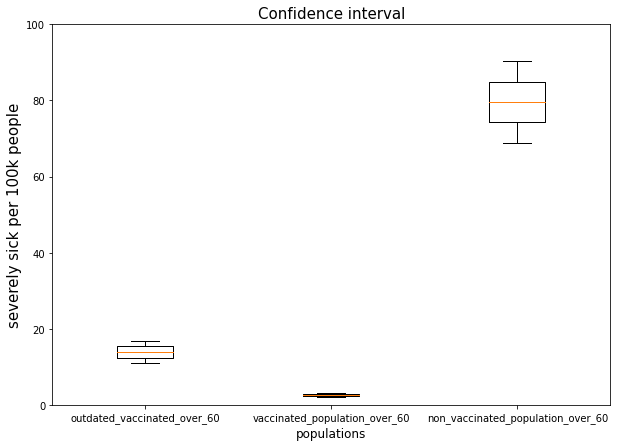

In [20]:
fig, axes = plt.subplots(figsize=(10,7), ncols=1)
myData = [outdated_vaccinated_over_60_population,vaccinated_population_over_60,non_vaccinated_population_over_60]
fig=plt.boxplot(myData)
plt.ylim(0,100)
plt.title("Confidence interval",fontsize = 15)
plt.xlabel('populations',fontsize = 12)
plt.ylabel('severely sick per 100k people',fontsize = 15)
plt.xticks([1, 2, 3], ['outdated_vaccinated_over_60', 'vaccinated_population_over_60', 'non_vaccinated_population_over_60'],fontsize = 10)
plt.show()

# QUESTION 5:

#### We can can come to the conclusion from the boxlots above that:                 
1) since the boxplots aren't at the same height, than the average sick per population are for sure different.                                
2) we can say for certain that the vaccines do help since the average sick in the vaccinated population is much less than the average sick of the non vaccinated population.

# QUESTION 6:


In [12]:
over_60_vaccinated_population = corona_data_population_over_60yrs_old['Vaccinated_Severe_Illness_Per_100K']
over_60_non_vaccinated_population= corona_data_population_over_60yrs_old['Non_Vaccinated_Severe_Illness_Per_100K']

In [13]:
st.ttest_ind(over_60_vaccinated_population,over_60_non_vaccinated_population, equal_var=False,alternative='less')
#H1 - LESS
#H0 - NOT LESS
# CONCLUSION REJECT H0

Ttest_indResult(statistic=-18.51066128913713, pvalue=6.133781972455953e-18)

# QUESTION 7:

## part 1 of question 7:

We reject H0!                       
summery:                            
Since our Pvalue(a number that approaches zero) is less then our alpha(0.01) we can come to the conclusion that
the average sick per one houndred thousend people of the over 60 year old VACCINATED population IS LESS then the average sick of the over 60 year old NON VACCINATED population.

## part 2 of question 7:
 ### 1-pvalue = 99.999%                        
#### I can confirm part 1 of question 7 with close to one houndred percent confidence.

